## In this dataset, the data represents information related to graduate admissions with multiple features (X) that are considered during the admission process. The features are the following: Serial No., GRE Score, TOEFL Score, University Rating, Statement of Purpose (SOP), Letter of Recommendation (LOR) Strength, Cumulative Grade Point Average (CGPA), Research Experience (1 for having research experience and 0 for none). The last column represents the target value (y) Chance of Admit which is a number between 0 and 1 indicating the likelihood of admission.

## The dataset contains 500 examples, these examples will be used to analyze the relationship between the multiple features described above and the chance of being admitted to a graduate program, in order to build a predictive multivariate linear regression model.

# Import Necessary Libraries

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Linear Regression Using Scikit Learn Library

In [2]:
# Function to learn a regression model using scikit learn library 
def sklearn_linear_regression(X_train, X_test, y_train, y_test):
    
    # Learn a regression model using scikit learn library
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, predictions)

    # Return thetas, predictions and the Mean Squared Error       
    return model.coef_, model.intercept_, predictions, mse

# MSE Cost Function

In [3]:
# Function to calculate MSE cost function
def calculate_cost(X_train, y_train, theta):
    
    m = X_train.shape[0] # Number of training examples
    
    predictions = np.dot(X_train, theta)
    
    error = predictions - y_train
    
    cost = (1/(2*m)) * np.sum(np.square(error))
    
    return cost

# Batch Gradient Descent

In [4]:
# Function to implement gradient descent
def gradient_descent(X_train, y_train, theta, learning_rate, iterations, convergence_test):
    
    m = X_train.shape[0]  # Number of training examples
    cost_history = []
    X_train = np.column_stack((np.ones(m), X_train)) #Adding a column of ones to X_train for the intercept
    
    for i in range(iterations):
        
        # Calculate gradients and update thetas
        prediction = np.dot(X_train, theta)
        theta = theta - (1/m) * learning_rate * np.dot((prediction - y_train), X_train)
        
        # Calculate cost
        cost_history.append(calculate_cost(X_train, y_train, theta))
        
        # Check if early stopping choice is selected
        if convergence_test == 1 and i > 0:
            # Calculate the change in cost
            cost_change = abs(cost_history[-2] - cost_history[-1])
            if cost_change < 0.0002:
                print("\nConvergence reached at iteration:", i)
                break  
        

    return theta, cost_history

# Dataset Loading

In [5]:
# Load the dataset.
graduate_admission_df=pd.read_csv("graduate_admission_dataset.csv")

# Dataset Preprocessing

In [6]:
# Extract the input feature into X and the target into y.
X = graduate_admission_df.iloc[:, :-1]  
y = graduate_admission_df.iloc[:, -1]


# Dataset standardization
# using StandardScaler which Standardizes features by removing the mean and scaling to unit variance (Z-score normalization)
standard = preprocessing.StandardScaler()

# Fit your data on the scaler object
X_standard = standard.fit_transform(X)

# Dataset scaling
# using MinMaxScaler which transforms features by scaling each feature to a given range
scaler = preprocessing.MinMaxScaler()

# Fit your data on the scaler object
X_scaler = scaler.fit_transform(X)

# Spliting dataset to training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.01, random_state=42)


# Prediction


Sklearn linear Regression Theta0 (intercept): 

 0.7219728060635057

Sklearn linear Regression Theta1: 

 [0.01302183 0.02372265 0.01987302 0.00593008 0.00421447 0.01381918
 0.06765544 0.01078945]

Sklearn linear Regression Predictions: 

 [0.92265252 0.78207101 0.5806913  0.70108437 0.79990382]

Sklearn linear Regression Mean Squared Error:
 0.009622151306310674

Batch GD  Theta 0 & 1: 

 [0.72197281 0.01302183 0.02372266 0.01987301 0.00593008 0.00421447
 0.01381918 0.06765543 0.01078945]

 Batch GD Mean Squared Error:
 0.0016655777111264426


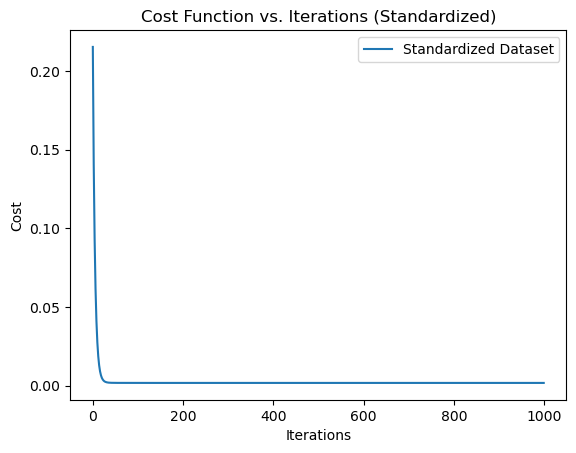

In [12]:
#Parameter Initialization
#theta = np.zeros((9, 1))
theta = np.zeros((9,))
learning_rate = 0.1
iterations = 1000
convergence_test = 0


# Run scikit learn linear regression
theta1, theta0, predictions, mse = sklearn_linear_regression(X_train, X_test, y_train, y_test)
print("\nSklearn linear Regression Theta0 (intercept): \n\n", theta0)
print("\nSklearn linear Regression Theta1: \n\n", theta1)
#print(pd.DataFrame({"Actual":  y_test, "Predict": predictions}).head())
print("\nSklearn linear Regression Predictions: \n\n", predictions)
print("\nSklearn linear Regression Mean Squared Error:\n", mse)


# Run gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations, convergence_test)
print("\nBatch GD  Theta 0 & 1: \n\n", theta) 
print("\n Batch GD Mean Squared Error:\n", cost_history[-1])

# Plot the cost history 
plt.plot(cost_history, label='Standardized Dataset')
plt.title('Cost Function vs. Iterations (Standardized)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()